In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
pel=pd.read_csv('ElectionData.csv')
pel.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [3]:
#Lets check the datatypes..
pel.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [4]:
#shape of the data

pel.shape

(21643, 28)

The dataset has 28 features(including target),which consists of same features twice which may leads to high/muliticollinearity.for instance pre-total voters and pre subscribed voters may overlap and get multiple collinearity

In [5]:
#Checking for null values..
pel.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

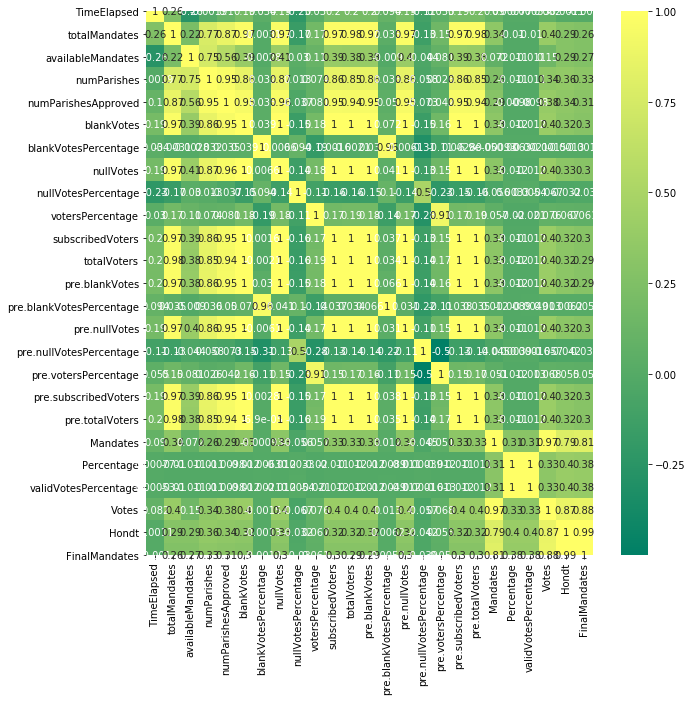

In [13]:
#Checking the correlation and dropping duplicates..


plt.figure(figsize=(10,10))
sbn.heatmap(pel.corr(),annot=True,cmap='summer')

In the above heatmap, the correlation is 1 for the overlapped features which leads to multicollinearity,dropping the columns would make the dataset easier to analyze.

In [14]:
#Dropping several columns with high correlation..(~1)

pel.drop(['totalMandates','pre.totalVoters','numParishesApproved','pre.blankVotes','pre.nullVotes','pre.blankVotesPercentage',
          'pre.subscribedVoters','Mandates','Percentage','pre.votersPercentage','nullVotes','subscribedVoters','blankVotes','totalVoters'],axis=1,inplace=True)



In [15]:
pel.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [16]:
pel.shape

(21643, 14)

In [17]:
#EDA..

for col in pel.columns:
    print(pel[col].value_counts())

255    403
40     403
135    403
55     403
230    403
150    403
70     403
245    403
165    403
85     403
260    403
180    403
100    403
195    403
115    403
35     403
210    403
130    403
50     403
225    403
145    403
65     403
240    403
160    403
80     403
175    403
215    403
120    403
75     403
125    403
45     403
220    403
140    403
60     403
235    403
200    403
155    403
250    403
110    403
190    403
170    403
90     403
265    403
185    403
105    403
95     403
205    403
15     386
20     386
30     386
5      386
10     386
25     386
0      386
Name: TimeElapsed, dtype: int64
2019-10-06 23:15:01    403
2019-10-07 00:25:01    403
2019-10-06 22:30:01    403
2019-10-06 21:50:01    403
2019-10-06 21:40:02    403
2019-10-06 22:10:01    403
2019-10-06 20:50:01    403
2019-10-06 22:40:02    403
2019-10-06 22:05:02    403
2019-10-07 00:00:02    403
2019-10-06 23:45:02    403
2019-10-06 23:35:02    403
2019-10-06 22:55:02    403
2019-10-06 21:00:01    

In [19]:
pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
TimeElapsed                21643 non-null int64
time                       21643 non-null object
territoryName              21643 non-null object
availableMandates          21643 non-null int64
numParishes                21643 non-null int64
blankVotesPercentage       21643 non-null float64
nullVotesPercentage        21643 non-null float64
votersPercentage           21643 non-null float64
pre.nullVotesPercentage    21643 non-null float64
Party                      21643 non-null object
validVotesPercentage       21643 non-null float64
Votes                      21643 non-null int64
Hondt                      21643 non-null int64
FinalMandates              21643 non-null int64
dtypes: float64(5), int64(6), object(3)
memory usage: 2.3+ MB


In [21]:
#Lets perform the univariate analysis
#seperating the numerical columns

num_cols=[cols for cols in pel.columns if pel[cols].dtypes!='O']

#Excluding the target column
num_cols.remove('FinalMandates')
num_cols

['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

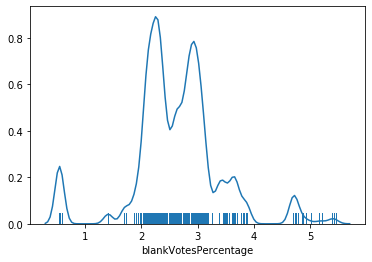

In [34]:
#Performing EDA

sbn.distplot(pel['blankVotesPercentage'],hist=False,rug=True)

blankVotesPercenage is normally distributed

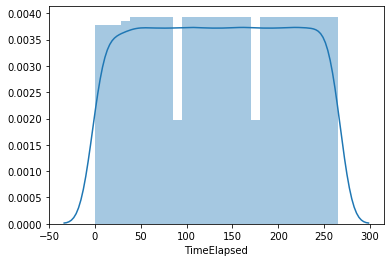

In [35]:
sbn.distplot(pel['TimeElapsed'])

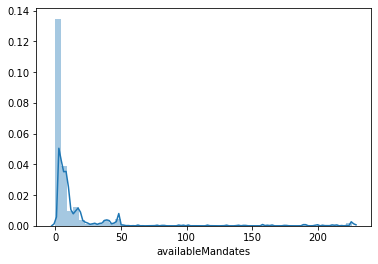

In [36]:
sbn.distplot(pel['availableMandates'])

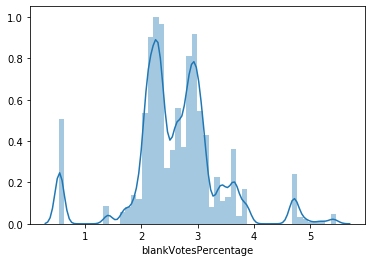

In [37]:
sbn.distplot(pel['blankVotesPercentage'])

Blankvotespercentage is normally distributed according to the plot shown above

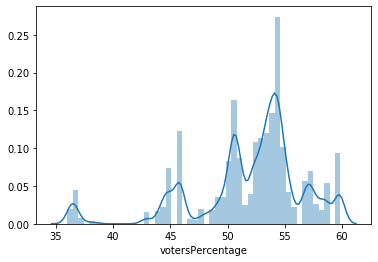

In [38]:
sbn.distplot(pel['pre.votersPercentage'])

The above plot shows,slightly right skewed distribution

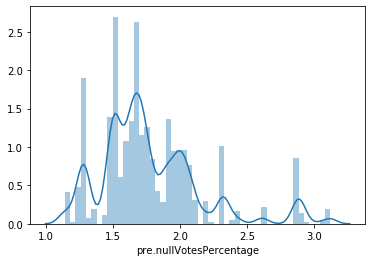

In [39]:
sbn.distplot(pel['pre.nullVotesPercentage'])

The above plot is normally distributed

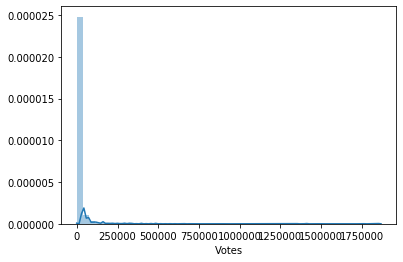

In [40]:
sbn.distplot(pel['Votes'])

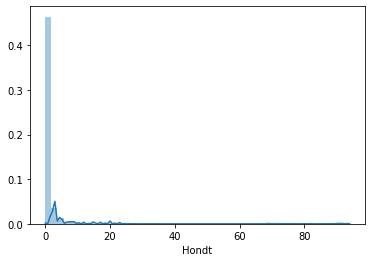

In [41]:
sbn.distplot(pel['Hondt'])

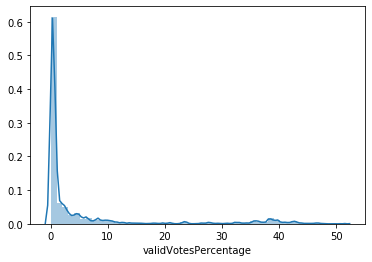

In [42]:
sbn.distplot(pel['validVotesPercentage'])

In [48]:
#Lets check the categorrical variables..

cat_cols=[cols for cols in pel.columns if pel[cols].dtypes =='O']
cat_cols

['time', 'territoryName', 'Party']

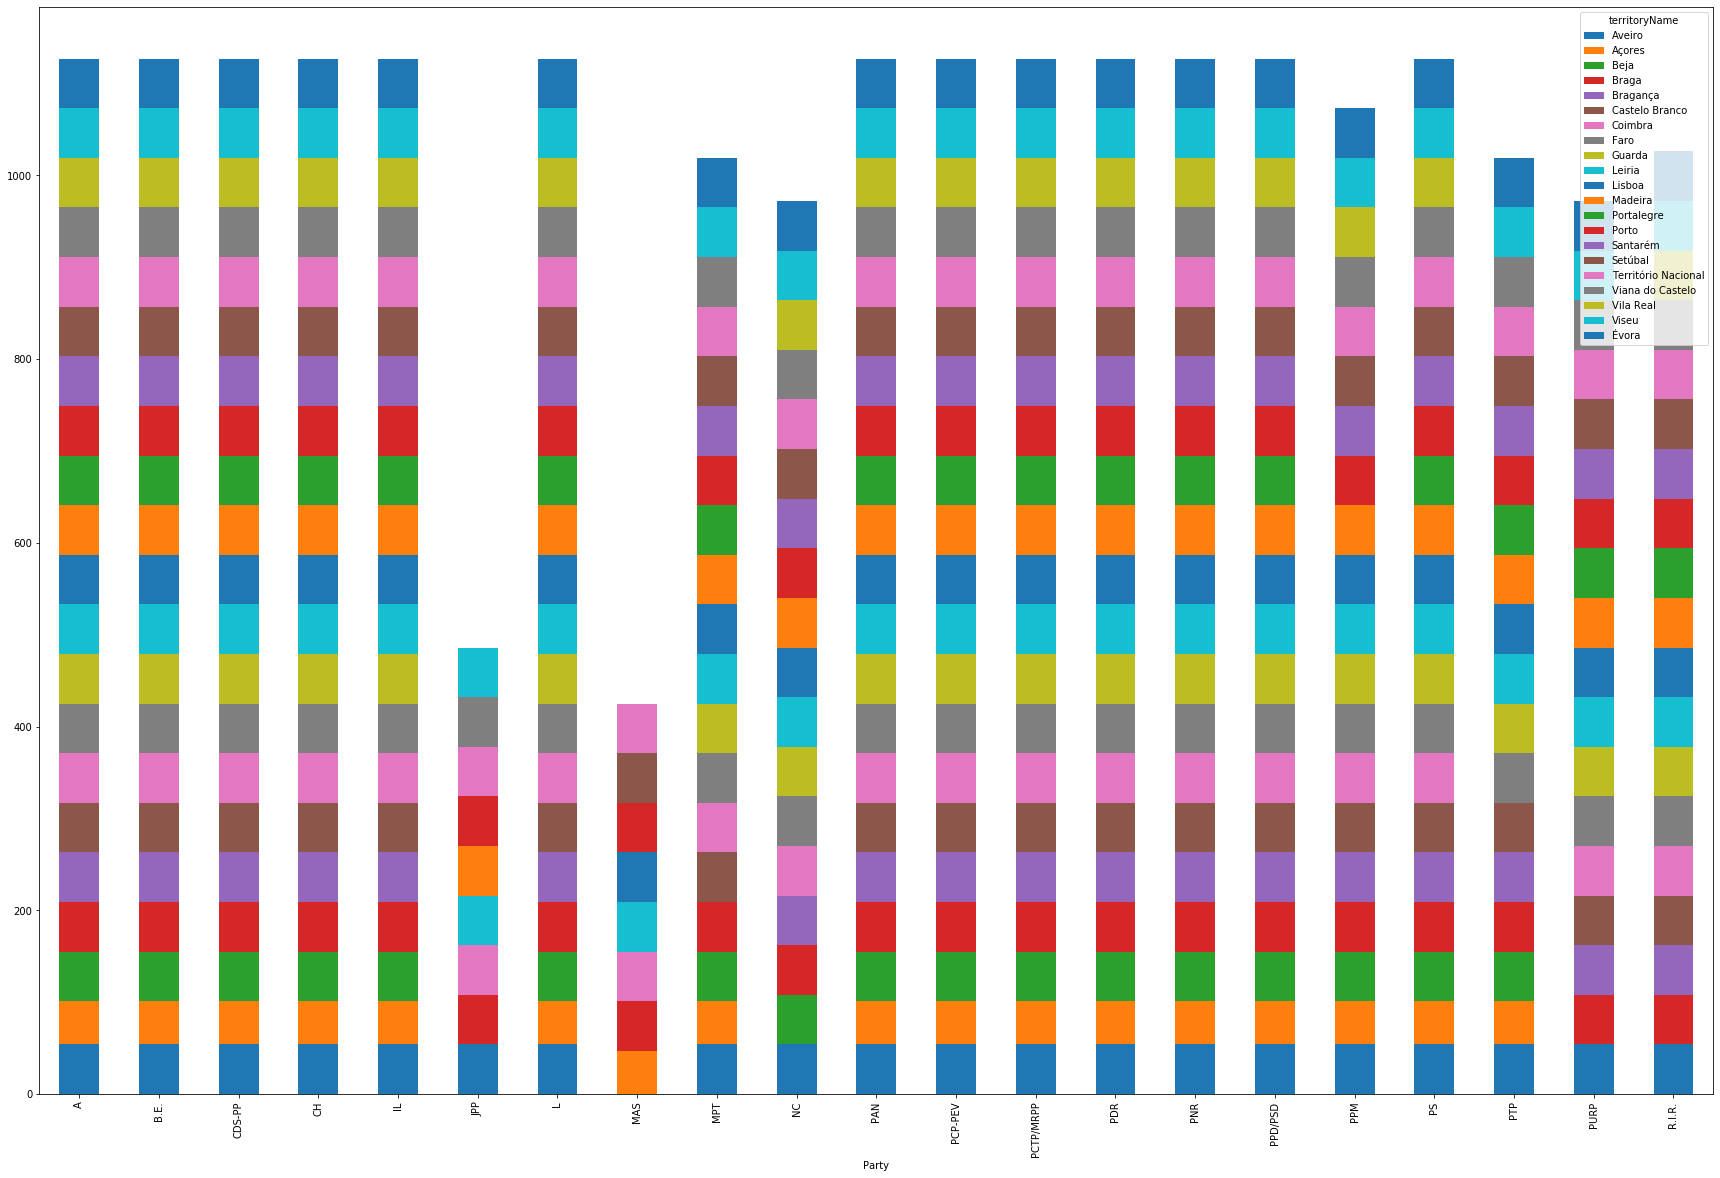

In [53]:
#EDA with category columns

pel.groupby(['Party','territoryName']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))

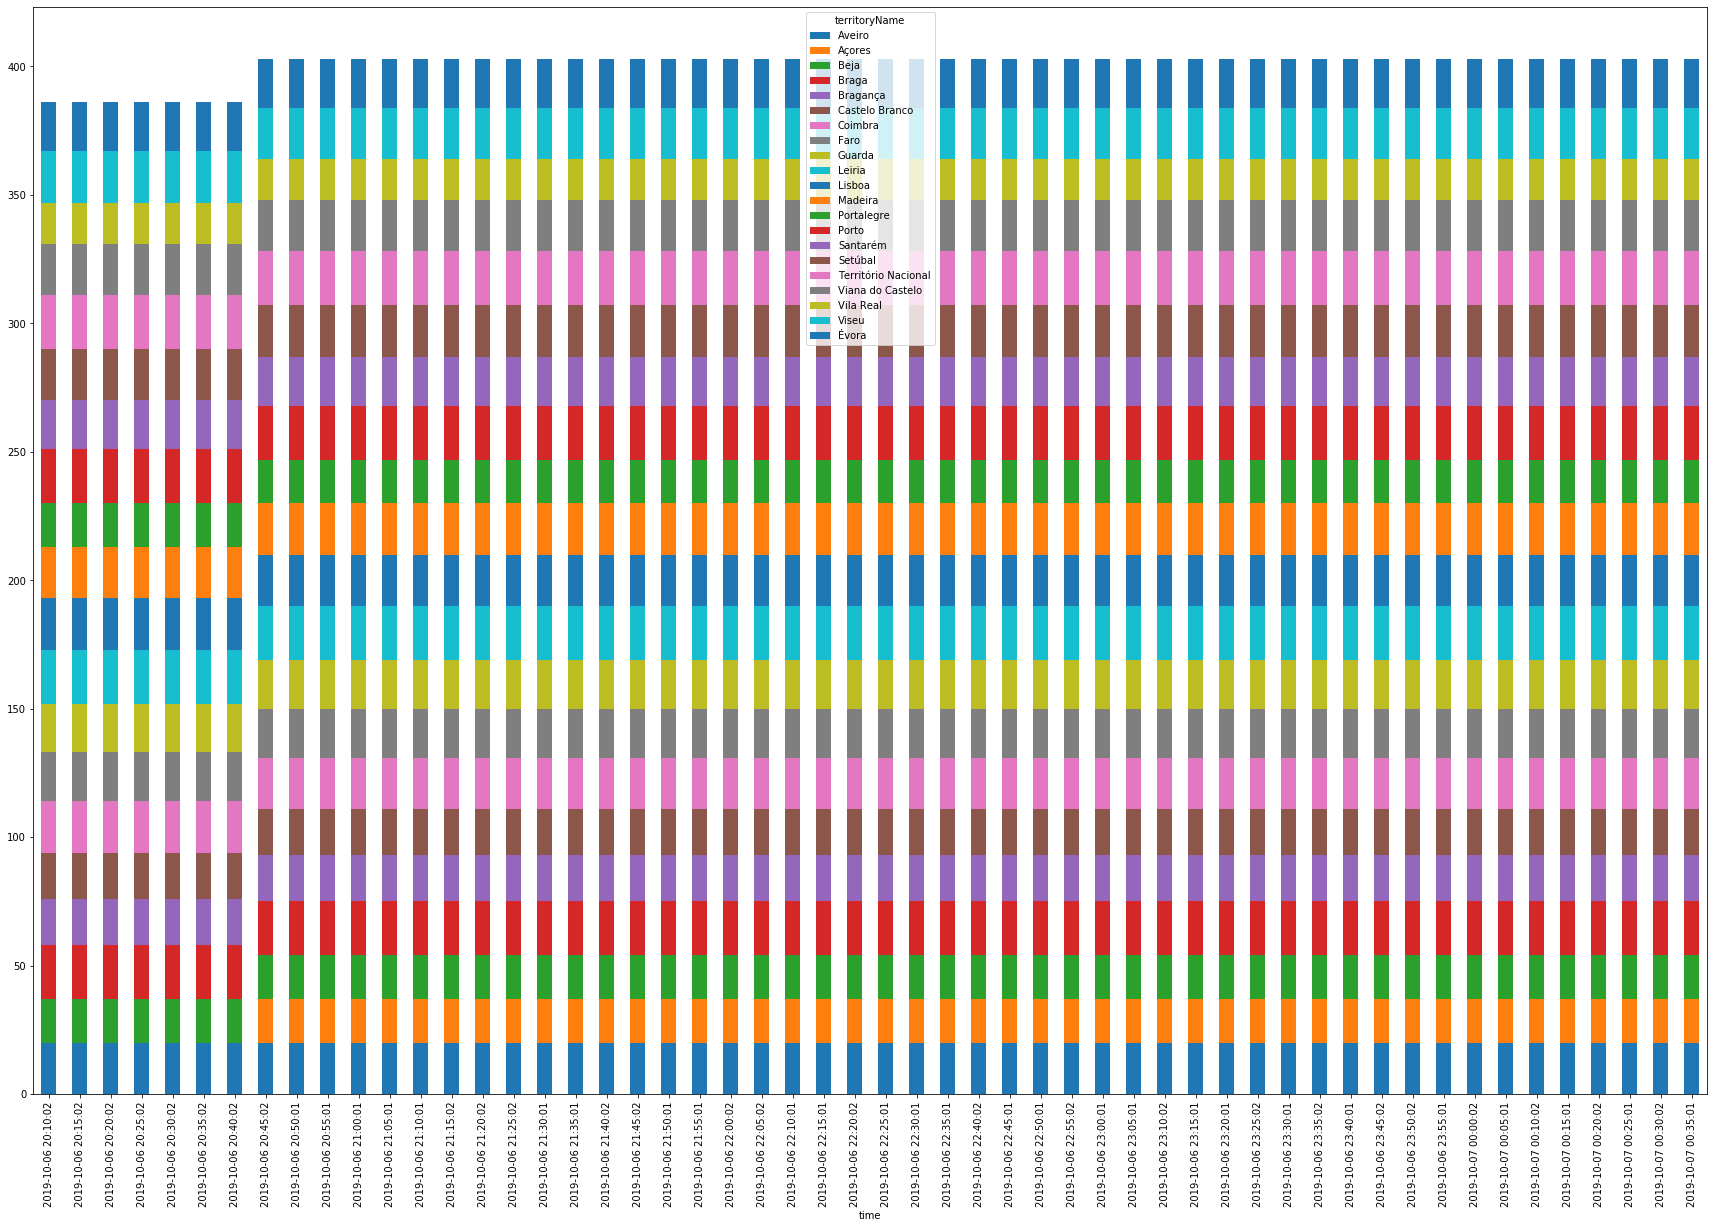

In [54]:
pel.groupby(['time','territoryName']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))

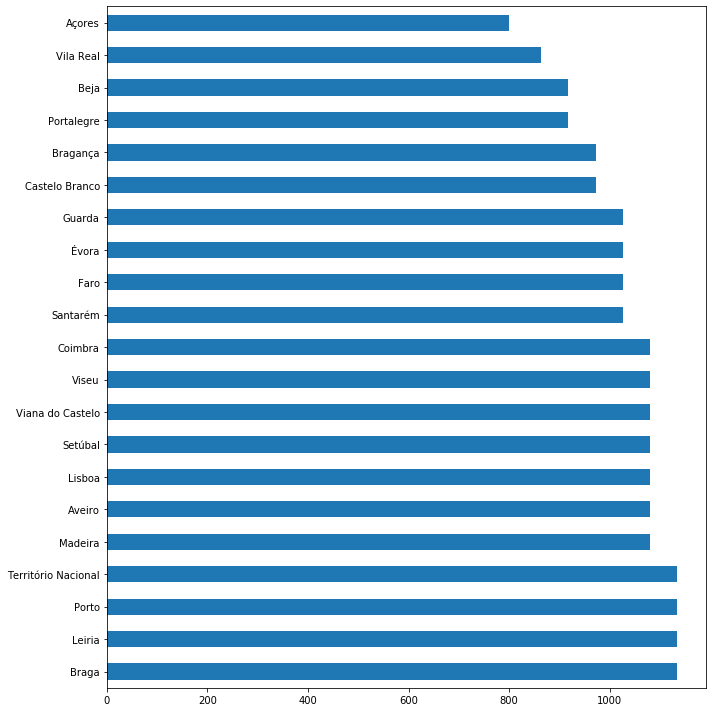

In [65]:
pel['territoryName'].value_counts().plot(kind='barh',figsize=(10,10))
plt.tight_layout()

The above plot suggests that most votes are from braga,leiria,porto

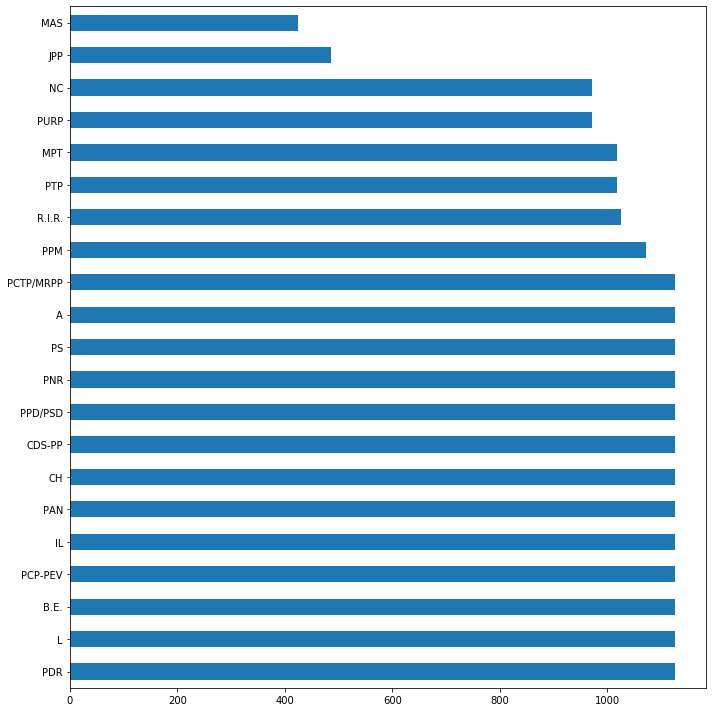

In [66]:
pel['Party'].value_counts().plot(kind='barh',figsize=(10,10))
plt.tight_layout()

The different parties  distributed accross the elections almost equally.

In [83]:
pd.crosstab(pel['territoryName'],pel['availableMandates'])

availableMandates,0,2,3,4,5,6,7,8,9,10,...,165,175,189,190,199,204,210,212,214,226
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,360,0,0,0,60,0,80,20,20,20,...,0,0,0,0,0,0,0,0,0,0
Açores,476,0,119,34,170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beja,680,51,187,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Braga,483,0,0,0,21,105,21,42,84,21,...,0,0,0,0,0,0,0,0,0,0
Bragança,486,108,378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Castelo Branco,576,0,180,216,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coimbra,480,0,0,100,0,160,40,100,200,0,...,0,0,0,0,0,0,0,0,0,0
Faro,513,0,57,0,0,133,0,95,228,0,...,0,0,0,0,0,0,0,0,0,0
Guarda,684,0,342,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(pel,index=['territoryName','Party'],values='numParishes').sort_values('numParishes',ascending=False)

numParishes
territoryName       Party                 
Território Nacional PURP              3092
                    NC                3092
                    PTP               3092
                    A                 3092
                    B.E.              3092
                    CDS-PP            3092
                    CH                3092
                    JPP               3092
                    L                 3092
                    MAS               3092
                    MPT               3092
                    IL                3092
                    PAN               3092
                    R.I.R.            3092
                    PCTP/MRPP         3092
                    PDR               3092
                    PNR               3092
                    PPD/PSD           3092
                    PPM               3092
                    PS                3092
                    PCP-PEV           3092
Braga               PCP-PEV            347
                    A                  347
                    B.E.               347
                    CDS-PP             347
                    CH                 347
                    MAS                347
                    IL                 347
                    JPP                347
                    L                  347
                    MPT                347
                    PDR                347
                    PCTP/MRPP          347
                    PPD/PSD            347
                    PNR                347
                    PAN                347
                    R.I.R.             347
                    PURP               347
                    PTP                347
                    PS                 347
                    NC                 347
                    PPM                347
Viseu               PPM                277
                    PPD/PSD            277
                    A                  277
                    B.E.               277
                    CDS-PP             277
                    R.I.R.             277
                    PURP               277
                    PTP                277
                    CH                 277
                    IL                 277
                    JPP                277
                    L                  277
                    PS                 277
                    NC                 277
                    PAN                277
                    PCP-PEV            277
                    PCTP/MRPP          277
                    PDR                277
                    PNR                277
                    MPT                277
Porto               R.I.R.             243
                    A                  243
                    B.E.               243
                    PNR                243
                    PURP               243
                    PS                 243
                    PPM                243
                    PPD/PSD            243
                    PDR                243
                    PCTP/MRPP          243
                    PCP-PEV            243
                    PAN                243
                    NC                 243
                    MPT                243
                    MAS                243
                    L                  243
                    JPP                243
                    IL                 243
                    CH                 243
                    PTP                243
                    CDS-PP             243
Guarda              IL                 242
                    L                  242
                    R.I.R.             242
                    PURP               242
                    PTP                242
                    PS                 242
                    PPM                242
                    PPD/PSD            242
                    PNR         

In [88]:
pd.pivot_table(pel,index=['Party'],values='blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


MAS is the party with highest num of blank votes percentage

In [90]:
pd.pivot_table(pel,index=['territoryName'],values='blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
territoryName,
Açores,4.855106
Leiria,3.726111
Coimbra,3.449259
Braga,3.076296
Aveiro,3.022407
Viana do Castelo,2.960185
Faro,2.939815
Santarém,2.865556
Viseu,2.761667


Acores,Madeira being  having the max and min blankvotespercentage respectively accross the territories

In [91]:
#voters percentage wrt party
pd.pivot_table(pel,index=['Party'],values='votersPercentage').sort_values('votersPercentage',ascending=False)

,votersPercentage
Party,
JPP,53.575556
MAS,53.198447
PURP,52.846543
MPT,52.509745
R.I.R.,52.441160
NC,52.224352
PTP,52.066035
PCTP/MRPP,51.771127
PS,51.771127


In [92]:
#voterspercentage accross territory

pd.pivot_table(pel,index=['territoryName'],values='votersPercentage').sort_values('votersPercentage',ascending=False)

,votersPercentage
territoryName,
Braga,59.378704
Porto,57.537222
Lisboa,56.889074
Santarém,54.879630
Castelo Branco,54.792037
Évora,54.408519
Aveiro,54.165741
Leiria,54.062963
Portalegre,53.786481


In [93]:
pd.pivot_table(pel,index=['Party'],values='validVotesPercentage').sort_values('validVotesPercentage',ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


JPP party has more voters percentage whereas PS party has more validvoters percentage

In [94]:
pd.pivot_table(pel,index=['Party'],values='FinalMandates').sort_values('FinalMandates',ascending=False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


Final mandates in PS are high

In [96]:
pel.dtypes

TimeElapsed                  int64
time                        object
territoryName               object
availableMandates            int64
numParishes                  int64
blankVotesPercentage       float64
nullVotesPercentage        float64
votersPercentage           float64
pre.nullVotesPercentage    float64
Party                       object
validVotesPercentage       float64
Votes                        int64
Hondt                        int64
FinalMandates                int64
dtype: object

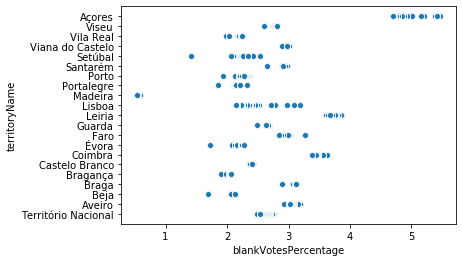

In [101]:

sbn.scatterplot('blankVotesPercentage','territoryName',data=pel)

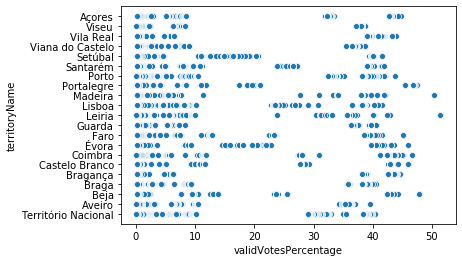

In [102]:
sbn.scatterplot('validVotesPercentage','territoryName',data=pel)

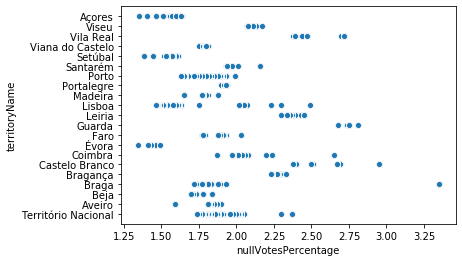

In [105]:
sbn.scatterplot('nullVotesPercentage','territoryName',data=pel)

In [111]:
#Looking for outliers and removing

nrows=12
ncol=10

collist=[cols for cols in pel.columns if pel[cols].dtypes!='O']
collist


['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt',
 'FinalMandates']

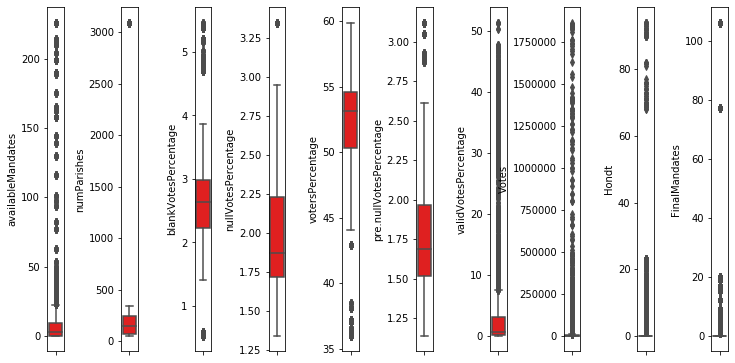

In [116]:
#visualizing outliers..
ncol=20
nrows=12
plt.figure(figsize=(ncol,3*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sbn.boxplot(pel[collist[i]],color='red',orient='v')
    plt.tight_layout()

There are outliers present in all columns

In [118]:
#categorical columns encoding with the label encoder

catcol=[col for col in pel.columns if pel[col].dtypes=='O']
catcol

['time', 'territoryName', 'Party']

In [122]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
pel['territoryName']=pd.DataFrame(le.fit_transform(pel['territoryName']))

In [123]:
pel.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,16,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,16,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,16,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [124]:
pel['Party']=pd.DataFrame(le.fit_transform(pel['Party']))

In [127]:
pel.drop('time',axis=1,inplace=True)

In [128]:
pel.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,147993,94,106
1,0,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,128624,81,77
2,0,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,26307,16,19
3,0,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,18923,12,5
4,0,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,17757,11,12


In [129]:
pl=pel.copy()

In [130]:
#Seperating features and label

x=pel.drop('FinalMandates',axis=1)
y=pel['FinalMandates']


In [132]:
#Bringing the features to a common scale
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [133]:
x.shape

(21643, 12)

In [135]:
y.shape

(21643,)

In [136]:
#train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [137]:
#Implementing the linear models 


lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
predy=lr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,predy))
print('Mean Squared Error:',mean_squared_error(y_test,predy))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predy)))
print('R2 sCcore is:',r2_score(y_test,predy))

Mean Absolute Error: 0.202098616154085
Mean Squared Error: 0.41922526019862505
Root Mean Squared Error: 0.6474760692092218
R2 sCcore is: 0.9894951437248484


In [139]:
#Cross validation

cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.99276778 0.99146144 0.99230182 0.99139922 0.9913337 ]
0.9918527939260328
0.0005774361998485695


In [140]:
#Selecting the random state

def max_r2_score(model,x,y):
    f_r2_score=0
    for rst in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=rst)
        model.fit(x_train,y_train)
        predm=model.predict(x_test)
        r2s=r2_score(y_test,predm)
        print('r2 score is',r2s,'for the random state',rst)
    
        if r2s>f_r2_score:
            f_r2_score=r2s
    print('max r2 score for the corresponding random state is ',f_r2_score,rst)
    return rst

In [141]:
max_r2_score(lr,x,y)

r2 score is 0.9930791693113191 for the random state 42
r2 score is 0.9915011952176189 for the random state 43
r2 score is 0.9924559034345969 for the random state 44
r2 score is 0.9894951437248484 for the random state 45
r2 score is 0.9897690593044837 for the random state 46
r2 score is 0.9925558965916339 for the random state 47
r2 score is 0.9906711981020007 for the random state 48
r2 score is 0.9927983239829369 for the random state 49
r2 score is 0.9921459547878829 for the random state 50
r2 score is 0.9912421286245653 for the random state 51
r2 score is 0.9914145109513293 for the random state 52
r2 score is 0.991861886116161 for the random state 53
r2 score is 0.9921845794651356 for the random state 54
r2 score is 0.9897946969429432 for the random state 55
r2 score is 0.9920052121311472 for the random state 56
r2 score is 0.9907920590491894 for the random state 57
r2 score is 0.9923048415423776 for the random state 58
r2 score is 0.9910802622446423 for the random state 59
r2 score is

99

In [143]:
dtr=DecisionTreeRegressor(criterion='mse')

params={'criterion': ['mse'],
 'max_depth': [None],
 'max_features': [None],
 'max_leaf_nodes': [4,8,16],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,4],
 'min_weight_fraction_leaf': [0.0],
 'presort': [False],
 'random_state': [None],
 'splitter': ['best']}

from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=dtr,param_grid=params)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [144]:
#Decision Tree Regressor

dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=16,
 min_impurity_decrease=0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))
print('R2 sCcore is:',r2_score(y_test,dtrpr))


Mean Absolute Error: 0.059484582114922066
Mean Squared Error: 0.04645590489949742
Root Mean Squared Error: 0.2155363192120934
R2 sCcore is: 0.9988359179409415


In [146]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predm=model.predict(x_test)
print('mean r2 score for gradient boosting regressor is',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for gradient boosting regressor is 0.9993523479844055


In [147]:
adb=AdaBoostRegressor(base_estimator=lr,n_estimators=10)
adb.fit(x_train,y_train)
predadb=adb.predict(x_test)
print('mean r2 score for adaboost regressor is',cross_val_score(lr,x_train,y_train,cv=5,scoring='r2').mean())


mean r2 score for adaboost regressor is 0.9918527939260328


In [148]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knrp=knr.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(knr,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for kNeighbor regressor is 0.9999322533589321


In [149]:
#Lets use RandomForest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(rf,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for kNeighbor regressor is 0.9999060666334794


In [150]:
#Fitting the best model
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knrp=knr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,knrp))
print('Mean Squared Error:',mean_squared_error(y_test,knrp))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,knrp)))
print('Mean R2 sCcore is:',r2_score(y_test,knrp).mean())

Mean Absolute Error: 0.0033599328013439733
Mean Squared Error: 0.0019599608007839844
Root Mean Squared Error: 0.04427144453012556
Mean R2 sCcore is: 0.9999508877244004


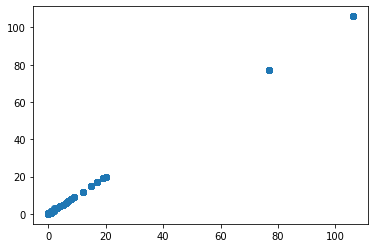

In [151]:
#plotting actual vs predicted

plt.scatter(y_test,knrp)
plt.show()

In [153]:
#Saving the predicted values to csv

knr=pd.DataFrame(knrp,columns=['FinalMandates'])

In [154]:
knr.head()

,FinalMandates
0,0.0
1,0.0
2,0.0
3,4.0
4,0.0


In [155]:
y_test.head()

11765    0
3020     0
15716    0
5330     4
17814    0
Name: FinalMandates, dtype: int64

In [156]:
#Saving to csv
knr.to_csv('Electionfinalmandatespredict.csv',index=False)

In [158]:
#Saving model

import joblib

joblib.dump(knr,'electionfinmandatepredction.pkl')

['electionfinmandatepredction.pkl']